**User Input Here**

In [ ]:
print('Welcome to the COVID-19_Projections Statistics')
print('')
print('Please tell me which state you would like to see. No spaces,acronoym only and all caps. Example: FL for Florida and AL for Alabama')
print('states/territories not available: CA,DC,DE,IA,IL,LA,MI,MO,NC,NV,PA,TX,VT,WV')
userinput = input('Please put state here:')

Welcome to the COVID-19 Projections Statistics

Please tell me which state you would like to see. No spaces,acronoym only and all caps. Example: FL for Florida and AL for Alabama
states/territories not available: CA,DC,DE,IA,IL,LA,MI,MO,NC,NV,PA,TX,VT,WV
Please put state here:FL


**Framework for Cases and Deaths from Covid_Projections**



In [ ]:
# Might need this cell if your data does not download directly from the URL
#!pip install fsspec
#!pip install pandas

In [ ]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [ ]:
# Grabbing the Data
url = 'https://github.com/youyanggu/covid19-infection-estimates-latest/raw/main/latest_all_estimates_states.csv'
df = pd.read_csv(url)

In [ ]:
#indexing the data
df = df.loc[:,['date','state','total_deaths','total_infected_mean']]


In [ ]:
#converting to datetime 
df['date'] = pd.to_datetime(df['date'])

In [ ]:
#renaming the columns
df['Deaths'] = df['total_deaths']
df['Cases'] = df['total_infected_mean']
df = df.drop(columns=['total_deaths','total_infected_mean'])

In [ ]:
# Making sure the data starts March 1st 
df = df[df['date'] >= '03-01-2020']


In [ ]:
# Dropping Null Values
df = df.dropna()

In [ ]:
# making creating the day column
df['Day'] = df.groupby('state')['date'].rank(ascending=True)

In [ ]:
df['Avg day of case'] = 0 # declaring new column
df['Avg day of death'] = 0

In [ ]:
df.loc[df.groupby('state')['date'].head(1).index, 'Avg day of case'] = df.loc[:,'Day']

In [ ]:
# getting user input
df = df[df['state'] == userinput]

In [ ]:
#making sure it only calculate where the deaths >0
df = df[df['Deaths'] > 0]

In [ ]:
#creating a new column
df['Avg day of death'] = 0

In [ ]:
#Setting the first day as the first row in Avg day of death
df.loc[df.groupby('state')['date'].head(1).index, 'Avg day of death'] = df.loc[:,'Day']

In [ ]:
# creating the CDF Column
df['cdf_cases'] = df['Cases']

In [ ]:
#creating the cdf column
df['cdf_deaths'] = df['Deaths']

In [ ]:
#creating the formula for the CDF column
df.loc[:,'cdf_cases':] = df.loc[:,'cdf_cases':].div(df.iloc[-1]['cdf_cases':])
df = df.reset_index()

In [ ]:
#creating the formula for the CDF column
df['cdf_deaths'] = df.loc[:,'cdf_deaths':].div(df.iloc[-1]['cdf_deaths':])

In [ ]:
#Calulating Avgerage day of case
for i in range(1, len(df)):
  x = (((df.loc[i, 'Cases'] - df.loc[i-1, 'Cases']) * (df.loc[i, 'Day']- df.loc[i-1, 'Avg day of case'])) / (df.loc[i, 'Cases'])) + (df.loc[i-1, 'Avg day of case'])
  df.loc[i, 'Avg day of case'] = round(x, 2)


In [ ]:
#Calulating Avgerage day of death
for i in range(1, len(df)):
  x = (((df.loc[i, 'Deaths'] - df.loc[i-1, 'Deaths']) * (df.loc[i, 'Day']- df.loc[i-1, 'Avg day of death'])) / (df.loc[i, 'Deaths'])) + (df.loc[i-1, 'Avg day of death'])
  df.loc[i, 'Avg day of death'] = round(x, 2)

In [ ]:
#dropping null values for deaths
df = df.dropna()

In [ ]:
df['Avg Death Day - Avg Case Day'] = df['Avg day of death'] - df['Avg day of case'] 

In [ ]:
df['Avg Day of Case/ Current Day'] = df['Avg day of case'] / df['Day']

In [ ]:
df['Avg Day of Death/ Current Day'] = df['Avg day of death'] / df['Day']

In [ ]:
# converting to datetime
df.date = pd.to_datetime(df.date)

**Framework for hospital data**

In [ ]:
# downloading the data
url = 'https://covidtracking.com/data/download/all-states-history.csv'

In [ ]:
# saving to a df
hospitalizationdf = pd.read_csv(url)

In [ ]:
#indexing column
hospitalizationdf = hospitalizationdf.loc[:,['state','date','hospitalizedCumulative']]

In [ ]:
#changing to datetime 
hospitalizationdf.date = pd.to_datetime(hospitalizationdf.date)

In [ ]:
# making sure the state is the same
hospitalizationdf = hospitalizationdf[hospitalizationdf.state == userinput]

In [ ]:
# Flipping the df 
hospitalizationdf = hospitalizationdf.iloc[::-1]

In [ ]:
# starting the date at 03-01-2020
hospitalizationdf = hospitalizationdf[hospitalizationdf['date'] >= '03-01-2020']

In [ ]:
# making sure the date is greater than 0
hospitalizationdf = hospitalizationdf [hospitalizationdf.hospitalizedCumulative >0]

In [ ]:
# resetting the index
hospitalizationdf = hospitalizationdf.reset_index()

In [ ]:
# cleaning data 
hospitalizationdf = hospitalizationdf.drop(columns= 'index')

In [ ]:
#merging the two dataframes together
df = df.merge(hospitalizationdf, on ='date')

In [ ]:
# cleaning data
df = df.drop(columns = ['state_y','index'])

In [ ]:
# cleaning data 
df['state'] = df['state_x']

In [ ]:
#cleanign data
df = df.drop(columns = 'state_x')

In [ ]:
#creating the cdf column
df['cdf_hospitalized'] = df['hospitalizedCumulative']

In [ ]:
#creating the formula for the CDF column
df.loc[:,'cdf_hospitalized':] = df.loc[:,'cdf_hospitalized':].div(df.iloc[-1]['cdf_hospitalized':])
df = df.reset_index()

In [ ]:
# Cleaning data
df= df.drop(columns = ['index'])

In [ ]:
# Creating avg day of hospitalization
df['Avg day of hospitalization'] = 0

In [ ]:
#Calulating Avgerage day of Hospitalization
for i in range(1, len(df)):
  x = (((df.loc[i, 'hospitalizedCumulative'] - df.loc[i-1, 'hospitalizedCumulative']) * (df.loc[i, 'Day']- df.loc[i-1, 'Avg day of hospitalization'])) / (df.loc[i, 'hospitalizedCumulative'])) + (df.loc[i-1, 'Avg day of hospitalization'])
  df.loc[i, 'Avg day of hospitalization'] = round(x, 2)

In [ ]:
df['Avg Hospitalization Day - Avg Case Day'] = df['Avg day of hospitalization'] - df['Avg day of case']  

In [ ]:
df['Avg Day of Hospitalization/ Current Day'] = df['Avg day of hospitalization'] /df['Day']

In [ ]:
# Cleaning dataframe
df = df.loc[:,['date','state','Deaths','Cases','hospitalizedCumulative','Day','Avg day of case','Avg day of death','Avg day of hospitalization','Avg Death Day - Avg Case Day','Avg Hospitalization Day - Avg Case Day','Avg Day of Case/ Current Day','Avg Day of Death/ Current Day','Avg Day of Hospitalization/ Current Day','cdf_cases','cdf_deaths','cdf_hospitalized']]

In [ ]:
df

,date,state,Deaths,Cases,hospitalizedCumulative,Day,Avg day of case,Avg day of death,Avg day of hospitalization,Avg Death Day - Avg Case Day,Avg Hospitalization Day - Avg Case Day,Avg Day of Case/ Current Day,Avg Day of Death/ Current Day,Avg Day of Hospitalization/ Current Day,cdf_cases,cdf_deaths,cdf_hospitalized
0,2020-03-21,FL,12,84754.7,158.0,21.0,12.12,17.01,0.00,4.89,-12.12,0.577143,0.810000,0.000000,0.0135573,0.000394296,0.00200137
1,2020-03-22,FL,13,91483.5,185.0,22.0,12.85,17.39,3.21,4.54,-9.64,0.584091,0.790455,0.145909,0.0146336,0.000427154,0.00234337
2,2020-03-23,FL,14,98100.5,217.0,23.0,13.53,17.79,6.13,4.26,-7.40,0.588261,0.773478,0.266522,0.015692,0.000460012,0.00274871
3,2020-03-24,FL,18,104563.0,259.0,24.0,14.18,19.17,9.03,4.99,-5.15,0.590833,0.798750,0.376250,0.0167258,0.000591444,0.00328072
4,2020-03-25,FL,22,110832.0,316.0,25.0,14.79,20.23,11.91,5.44,-2.88,0.591600,0.809200,0.476400,0.0177286,0.000722876,0.00400274
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
333,2021-02-17,FL,29824,6196430.0,77994.0,354.0,215.11,223.89,201.10,8.78,-14.01,0.607655,0.632458,0.568079,0.991173,0.979957,0.987941
334,2021-02-18,FL,29990,6210310.0,78295.0,355.0,215.42,224.62,201.69,9.20,-13.73,0.606817,0.632732,0.568141,0.993394,0.985411,0.991754
335,2021-02-19,FL,30214,6224190.0,78590.0,356.0,215.73,225.59,202.27,9.86,-13.46,0.605983,0.633680,0.568174,0.995614,0.992771,0.995491
336,2021-02-20,FL,30339,6237940.0,78840.0,357.0,216.04,226.13,202.76,10.09,-13.28,0.605154,0.633417,0.567955,0.997813,0.996878,0.998657


**Statistics**

In [ ]:
averagedayofcase = df['Avg day of case'].iloc[-1]
averagedayofdeath = df['Avg day of death'].iloc[-1]
differDeaths = df['Avg Death Day - Avg Case Day'].max()
differCases= -df['Avg Death Day - Avg Case Day'].min()
differhospitalizations = df['Avg Hospitalization Day - Avg Case Day'].max()
differhospitalizations1 = -df['Avg Hospitalization Day - Avg Case Day'].min()

In [ ]:
print('COVID-19 STATISTICS')
print('')
print('State = ', df.state.iloc[-1])
print('Average Day of Death and Average Day of Case as of',df['date'].iloc[-1])
print('Case =', averagedayofcase)
print('Death = ', averagedayofdeath)
print('Days When Average Dates of Death Differ By Largest Amounts')
print('Death Day – Case Day =', differDeaths)
print('Case Day - Death Day =',differCases)
print('Case Day - Hospitalization day = ',differhospitalizations)
print('Hospialization Day - Case Day =', differhospitalizations1) 

COVID-19 STATISTICS

State =  FL
Average Day of Death and Average Day of Case as of 2021-02-21 00:00:00
Case = 216.35
Death =  226.54
Days When Average Dates of Death Differ By Largest Amounts
Death Day – Case Day = 21.55000000000001
Case Day - Death Day = 20.209999999999994
Case Day - Hospitalization day =  17.740000000000002
Hospialization Day - Case Day = 20.309999999999988


**Data Visualization**

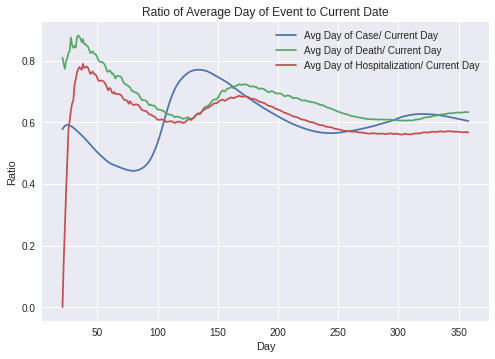

In [ ]:
#Ratio Avg Day of Event/Current Date Graph
df.plot(x= 'Day',y = ['Avg Day of Case/ Current Day','Avg Day of Death/ Current Day','Avg Day of Hospitalization/ Current Day'],title = 'Ratio of Average Day of Event to Current Date', ylabel = 'Ratio')
plt.style.use('seaborn')

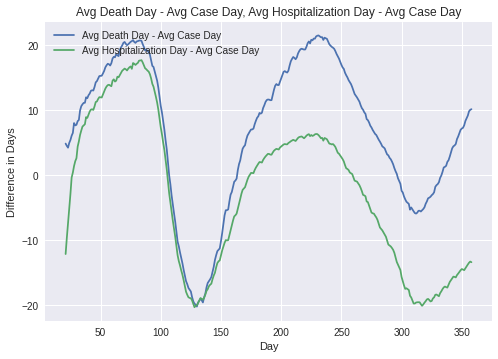

In [ ]:
#Avg Death Day-Avg Case Day
df.plot(x = 'Day', y=['Avg Death Day - Avg Case Day','Avg Hospitalization Day - Avg Case Day'],title = 'Avg Death Day - Avg Case Day, Avg Hospitalization Day - Avg Case Day',ylabel = 'Difference in Days')
plt.style.use('seaborn')

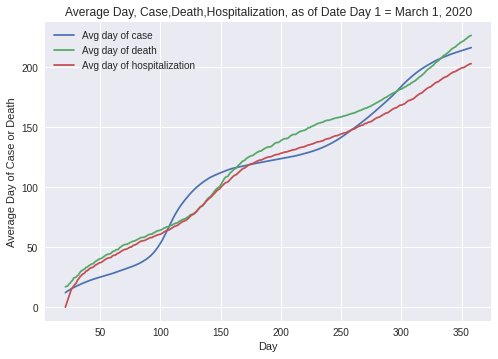

In [ ]:
#Average Case or Death or hospitalization
df.plot(x = 'Day', y= ['Avg day of case','Avg day of death','Avg day of hospitalization'],title = 'Average Day, Case,Death,Hospitalization, as of Date Day 1 = March 1, 2020', ylabel = 'Average Day of Case or Death')
plt.style.use('seaborn')

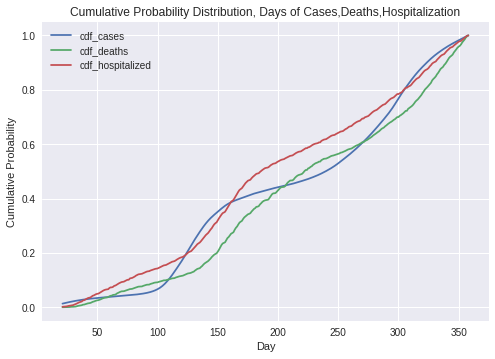

In [ ]:
#CDF
df.plot( x= 'Day', y= ['cdf_cases','cdf_deaths','cdf_hospitalized'],title = 'Cumulative Probability Distribution, Days of Cases,Deaths,Hospitalization', ylabel = 'Cumulative Probability')
plt.style.use('seaborn')